In [9]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Merging Data
Data from 2016, 2019, and 2024 are merged into one dataframe and saved as a .csv file. This .csv is inported into ArcGIS Pro where the lasso tool is used to create geographic subsets.

In [10]:
path = "cleaned_data/"
all_files = glob.glob(path + "clean_*.csv")
all_files.sort()
all_files

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

all_rad = pd.concat(li, axis=0, ignore_index=True)

lam = 550
all_rad['diam'] = (lam*all_rad['sizeparam'])/(np.pi)

all_rad.to_csv('cleaned_data/all_years.csv', index=False)

# Importing Subsetted Data
Geographic subsets are created in ArcGIS Pro and saved as .csv files. We import the data from GIS_sub.

In [11]:
pd.options.mode.chained_assignment = None  # default='warn'

Imperial_Valley = pd.read_csv("cleaned_data/GIS_sub/Imperial_Valley.csv")
Inland_Empire = pd.read_csv("cleaned_data/GIS_sub/Inland_Empire.csv")
LA = pd.read_csv("cleaned_data/GIS_sub/LA.csv")
Santa_Barbara = pd.read_csv("cleaned_data/GIS_sub/Santa_Barbara.csv")
Ocean = pd.read_csv("cleaned_data/GIS_sub/Ocean.csv")
Central_Valley = pd.read_csv("cleaned_data/GIS_sub/Central_Valley.csv")

Imperial_Valley['location'] = "Imperial Valley"
Inland_Empire['location'] = "Inland Empire"
LA['location'] = "LA"
Santa_Barbara['location'] = "Santa Barbara"
Ocean['location'] = "Ocean"

# 36.3340384 is latitude near Visalia which is out breakpoint between the north and south Central Valley
North_Central_Valley = Central_Valley[Central_Valley['Latitude'] >= 36.3340384]
North_Central_Valley['location'] = "North Central Valley"

South_Central_Valley = Central_Valley[Central_Valley['Latitude'] < 36.3340384]
South_Central_Valley['location'] = "South Central Valley"

data = [North_Central_Valley, South_Central_Valley, Inland_Empire, LA, Imperial_Valley, Santa_Barbara, Ocean]

merged_df = pd.concat(data, ignore_index=True)


# Map of All Data

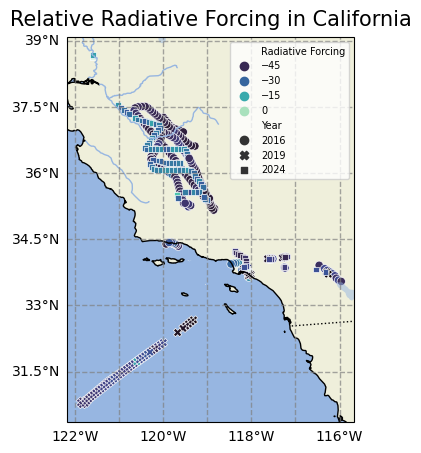

In [12]:
# map code by Rachel Wegener 

naames = merged_df
naames = naames.rename(columns={"rad": "Radiative Forcing", "year": "Year"})
# Create geodataframe
crs = ccrs.PlateCarree()
fig = plt.figure()
ax = plt.axes(projection=crs)

fig.set_size_inches(15, 5)  # Increase the size of the plot


# Add background features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_title("Relative Radiative Forcing in California", fontsize = 15)  # Add a title

# Add and format gridlines. Remove top and right labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                linewidth=1, color='gray', alpha=0.7, linestyle='--')
gl.top_labels, gl.right_labels = False, False
plot = sns.scatterplot(data=naames,x="Longitude", y="Latitude", hue="Radiative Forcing", style = "Year", palette = "mako")
plot.legend(fontsize=7)

plt.savefig('viz/all_cali_map.png', dpi=150)


# All Data by Year

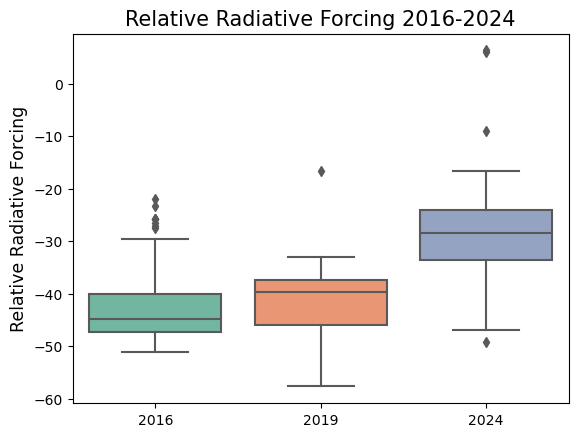

In [13]:
ax = sns.boxplot(x = merged_df['year'],
            y = merged_df['rad'],
            palette = 'Set2')

ax.set_title('Relative Radiative Forcing 2016-2024', fontsize = 15)
ax.set_ylabel('Relative Radiative Forcing', fontsize = 12.5)
ax.set_xlabel(None)

plt.savefig('viz/all_cali_data.png', dpi=150)

# All Data By Year and Regions

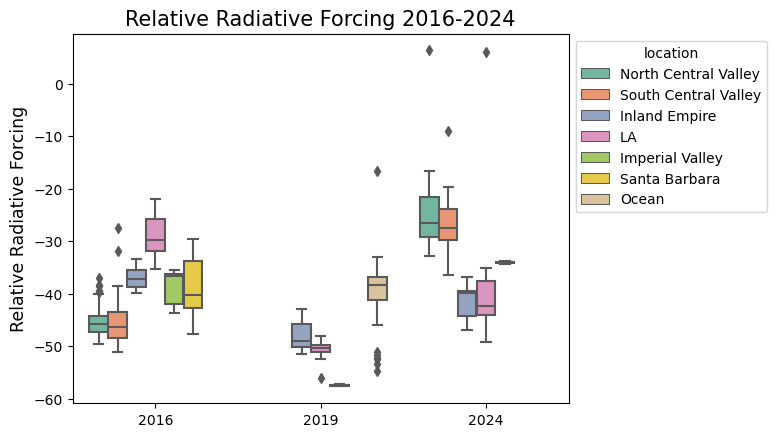

In [14]:
ax = sns.boxplot(x = merged_df['year'],
            y = merged_df['rad'],
            hue = merged_df['location'],
            palette = 'Set2')

ax.set_title('Relative Radiative Forcing 2016-2024', fontsize = 15)
ax.set_ylabel('Relative Radiative Forcing', fontsize = 12.5)
ax.set_xlabel(None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#plt.savefig('viz/all_cali_data_loc.png')
plt.savefig('viz/all_cali_data_loc.png', bbox_inches='tight')

# Less Cooling Regions

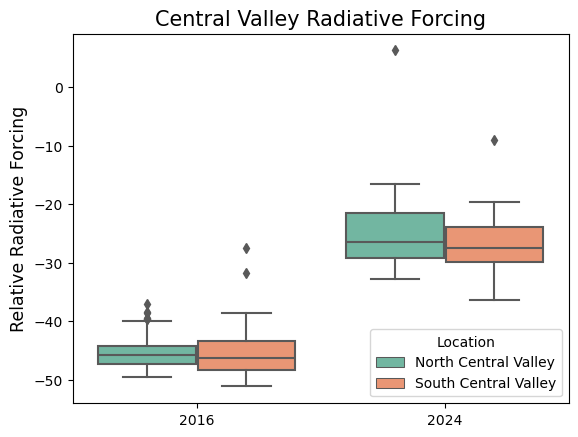

In [15]:
warming = merged_df[merged_df['location'].str.contains("North Central Valley|South Central Valley")]
warming = warming.rename(columns={"location": "Location"})
ax = sns.boxplot(x = warming['year'],
            y = warming['rad'],
            hue = warming['Location'],
            palette = 'Set2')

ax.set_title('Central Valley Radiative Forcing', fontsize = 15)
ax.set_ylabel('Relative Radiative Forcing', fontsize = 12.5)
ax.set_xlabel(None)
plt.savefig('viz/less_cooling_data.png', dpi=150)

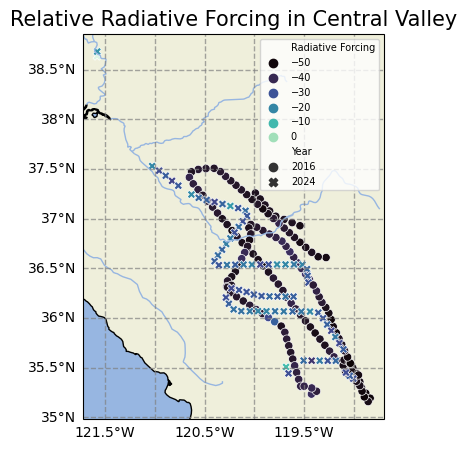

In [16]:
# map code by Rachel Wegener 

naames = merged_df[merged_df['location'].str.contains("North Central Valley|South Central Valley")]
naames = naames.rename(columns={"rad": "Radiative Forcing", "year": "Year"})
# Create geodataframe
crs = ccrs.PlateCarree()
fig = plt.figure()
ax = plt.axes(projection=crs)

fig.set_size_inches(15, 5)  # Increase the size of the plot


# Add background features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_title("Relative Radiative Forcing in Central Valley", fontsize = 15)  # Add a title

# Add and format gridlines. Remove top and right labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                linewidth=1, color='gray', alpha=0.7, linestyle='--')
gl.top_labels, gl.right_labels = False, False
plot = sns.scatterplot(data=naames,x="Longitude", y="Latitude", hue="Radiative Forcing", style = "Year", palette = "mako")
plot.legend(fontsize=7)

plt.savefig('viz/less_cooling_map.png', dpi=150)

# More Cooling Regions

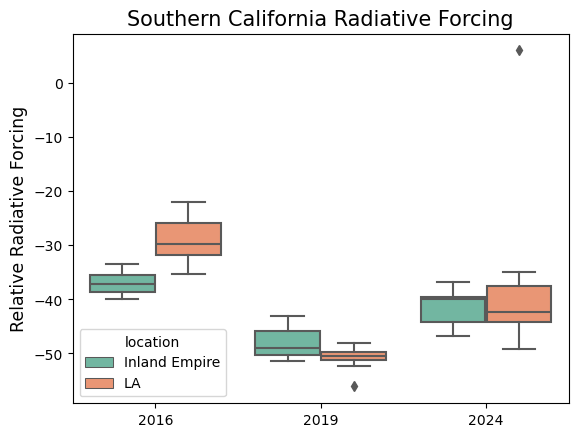

In [17]:
cooling = merged_df[merged_df['location'].str.contains("LA|Inland Empire")]

ax = sns.boxplot(x = cooling['year'],
            y = cooling['rad'],
            hue = cooling['location'],
            palette = 'Set2')

ax.set_title('Southern California Radiative Forcing', fontsize = 15)
ax.set_ylabel('Relative Radiative Forcing', fontsize = 12.5)
ax.set_xlabel(None)
plt.savefig('viz/more_cooling_data.png', dpi=150)

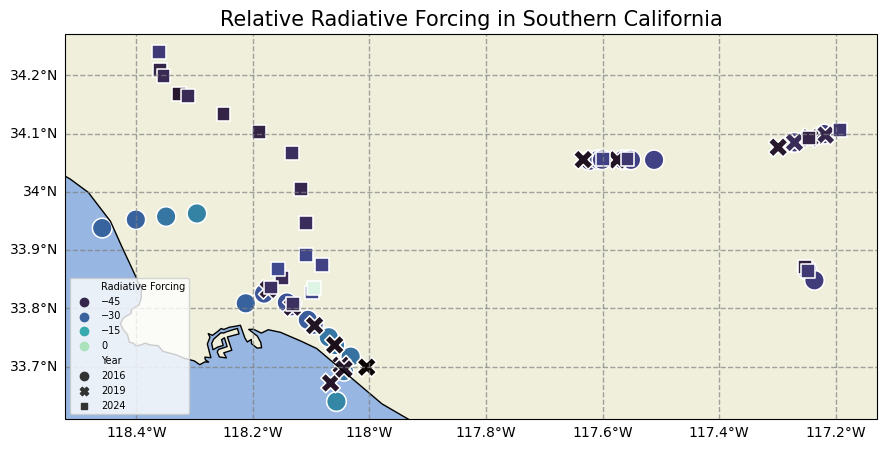

In [18]:
# map code by Rachel Wegener 

naames = merged_df[merged_df['location'].str.contains("LA|Inland Empire")]
naames = naames.rename(columns={"rad": "Radiative Forcing", "year": "Year"})
# Create geodataframe
crs = ccrs.PlateCarree()
fig = plt.figure()
ax = plt.axes(projection=crs)

fig.set_size_inches(15, 5)  # Increase the size of the plot


# Add background features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_title("Relative Radiative Forcing in Southern California", fontsize = 15)  # Add a title

# Add and format gridlines. Remove top and right labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                linewidth=1, color='gray', alpha=0.7, linestyle='--')
gl.top_labels, gl.right_labels = False, False
plot = sns.scatterplot(data=naames,x="Longitude", y="Latitude", hue="Radiative Forcing", style = "Year", s=200, palette = "mako")
plot.legend(fontsize=7)

plt.savefig('viz/more_cooling_map.png', dpi=150)